In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style("whitegrid")
# sns.set_context("paper")
sns.set(rc={'figure.figsize': (12,8)})

## Download the data

First, we download the data from the [John Hopkins Github](https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv) and make a inspection of the columns:

In [4]:
url = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
raw_data = pd.read_csv(url)

Now we can inspect the data:

In [5]:
raw_data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
249                                           NaN             Timor-Leste   
250                                           NaN                    Togo   
251                                           NaN     Trinidad and Tobago   
252                                           NaN                 Tunisia   
253                                           NaN                  Turkey   
254                                           NaN                      US   
255                                           NaN                  Uganda   
256                                           NaN                 Ukraine   
257                                           NaN    United Arab Emirates   
258                                      Anguilla          United Kingdom   
259                                       Bermuda          United Kingdom   
260                        British Virgin Islands          United Kingdom   
261                                Cayman Islands          United Kingdom   
262                               Channel Islands          United Kingdom   
263                   Falkland Islands (Malvinas)          United Kingdom   
264                                     Gibraltar          United Kingdom   
265                                   Isle of Man          United Kingdom   
266                                    Montserrat          United Kingdom   
267  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
268                      Turks and Caicos Islands          United Kingdom   
269                            

## Creating the data for plotting:

We will exclude the latitude and longitude columns since they are not useful:

In [6]:
data = raw_data.drop(columns=["Lat", "Long"])
data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
249                                           NaN             Timor-Leste   
250                                           NaN                    Togo   
251                                           NaN     Trinidad and Tobago   
252                                           NaN                 Tunisia   
253                                           NaN                  Turkey   
254                                           NaN                      US   
255                                           NaN                  Uganda   
256                                           NaN                 Ukraine   
257                                           NaN    United Arab Emirates   
258                                      Anguilla          United Kingdom   
259                                       Bermuda          United Kingdom   
260                        British Virgin Islands          United Kingdom   
261                                Cayman Islands          United Kingdom   
262                               Channel Islands          United Kingdom   
263                   Falkland Islands (Malvinas)          United Kingdom   
264                                     Gibraltar          United Kingdom   
265                                   Isle of Man          United Kingdom   
266                                    Montserrat          United Kingdom   
267  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
268                      Turks and Caicos Islands          United Kingdom   
269                            

Since we will exclude Hong-Kong from the China aggregated numbers, we can modify the country in the Hong-Kong province to Hong-Kong,

In [7]:
data.loc[data["Province/State"]=="Hong Kong", "Country/Region"] = "Hong Kong"
data

Province/State          Country/Region  \
0                                             NaN             Afghanistan   
1                                             NaN                 Albania   
2                                             NaN                 Algeria   
3                                             NaN                 Andorra   
4                                             NaN                  Angola   
5                                             NaN     Antigua and Barbuda   
6                                             NaN               Argentina   
7                                             NaN                 Armenia   
8                    Australian Capital Territory               Australia   
9                                 New South Wales               Australia   
10                             Northern Territory               Australia   
11                                     Queensland               Australia   
12                                South Australia               Australia   
13                                       Tasmania               Australia   
14                                       Victoria               Australia   
15                              Western Australia               Australia   
16                                            NaN                 Austria   
17                                            NaN              Azerbaijan   
18                                            NaN                 Bahamas   
19                                            NaN                 Bahrain   
20                                            NaN              Bangladesh   
21                                            NaN                Barbados   
22                                            NaN                 Belarus   
23                                            NaN                 Belgium   
24                                            NaN                  Belize   
25                                            NaN                   Benin   
26                                            NaN                  Bhutan   
27                                            NaN                 Bolivia   
28                                            NaN  Bosnia and Herzegovina   
29                                            NaN                Botswana   
..                                            ...                     ...   
249                                           NaN             Timor-Leste   
250                                           NaN                    Togo   
251                                           NaN     Trinidad and Tobago   
252                                           NaN                 Tunisia   
253                                           NaN                  Turkey   
254                                           NaN                      US   
255                                           NaN                  Uganda   
256                                           NaN                 Ukraine   
257                                           NaN    United Arab Emirates   
258                                      Anguilla          United Kingdom   
259                                       Bermuda          United Kingdom   
260                        British Virgin Islands          United Kingdom   
261                                Cayman Islands          United Kingdom   
262                               Channel Islands          United Kingdom   
263                   Falkland Islands (Malvinas)          United Kingdom   
264                                     Gibraltar          United Kingdom   
265                                   Isle of Man          United Kingdom   
266                                    Montserrat          United Kingdom   
267  Saint Helena, Ascension and Tristan da Cunha          United Kingdom   
268                      Turks and Caicos Islands          United Kingdom   
269                            

We will also exclude all the France regions that are not metropolitane France. First, let's take a look at the possible provinces:

In [8]:
data[data["Country/Region"]=="France"]["Province/State"].values

array(['French Guiana', 'French Polynesia', 'Guadeloupe', 'Martinique',
       'Mayotte', 'New Caledonia', 'Reunion', 'Saint Barthelemy',
       'Saint Pierre and Miquelon', 'St Martin', 'Wallis and Futuna', nan],
      dtype=object)

Now, we can exclude all the values besides the last one:

In [10]:
list_of_regions = data[data["Country/Region"]=="France"]["Province/State"].values[:-1]
data = data.drop(data[(data["Country/Region"] == "France") & (data["Province/State"].isin(list_of_regions))].index)

We do the same thing with Netherlands and UK:

In [11]:
print(data[data["Country/Region"]=="United Kingdom"]["Province/State"].values)
print(data[data["Country/Region"]=="Netherlands"]["Province/State"].values)

['Anguilla' 'Bermuda' 'British Virgin Islands' 'Cayman Islands'
 'Channel Islands' 'Falkland Islands (Malvinas)' 'Gibraltar' 'Isle of Man'
 'Montserrat' 'Saint Helena, Ascension and Tristan da Cunha'
 'Turks and Caicos Islands' nan]
['Aruba' 'Bonaire, Sint Eustatius and Saba' 'Curacao' 'Sint Maarten' nan]


In [12]:
regions_netherlands = data[data["Country/Region"]=="Netherlands"]["Province/State"].values[:-1]
data = data.drop(data[(data["Country/Region"] == "Netherlands") & (data["Province/State"].isin(regions_netherlands))].index)

regions_uk = data[data["Country/Region"]=="United Kingdom"]["Province/State"].values[:-1]
data = data.drop(data[(data["Country/Region"] == "United Kingdom") & (data["Province/State"].isin(regions_uk))].index)

## Visualizations:
Now we can make our plots, but first we need to group the data by country:

In [13]:
data_grouped = data.groupby('Country/Region').sum()
data_grouped.head()

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  \
Country/Region                                                                  
Afghanistan           0        0        0        0        0        0        0   
Albania               0        0        0        0        0        0        0   
Algeria               0        0        0        0        0        0        0   
Andorra               0        0        0        0        0        0        0   
Angola                0        0        0        0        0        0        0   

                1/29/20  1/30/20  1/31/20   ...     9/13/21  9/14/21  9/15/21  \
Country/Region                              ...                                 
Afghanistan           0        0        0   ...      154094   154180   154283   
Albania               0        0        0   ...      157436   158431   159423   
Algeria               0        0        0   ...      200301   200528   200770   
Andorra               0        0        0   ...       15096    15099    15108   
Angola                0        0        0   ...       50738    51047    51407   

                9/16/21  9/17/21  9/18/21  9/19/21  9/20/21  9/21/21  9/22/21  
Country/Region                                                                 
Afghanistan      154361   154487   154487   154487   154585   154712   154757  
Albania          160365   161324   162173   162953   163404   164276   165096  
Algeria          200989   201224   201425   201600   201766   201948   202122  
Andorra           15113    15124    15124    15124    15140    15140    15153  
Angola            51827    52208    52307    52307    52644    52968    53387  

[5 rows x 610 columns]

Now we can plot our selected countries:

Text(0.5,1,'Infection Cases of COVID-19 in Linear Scale')

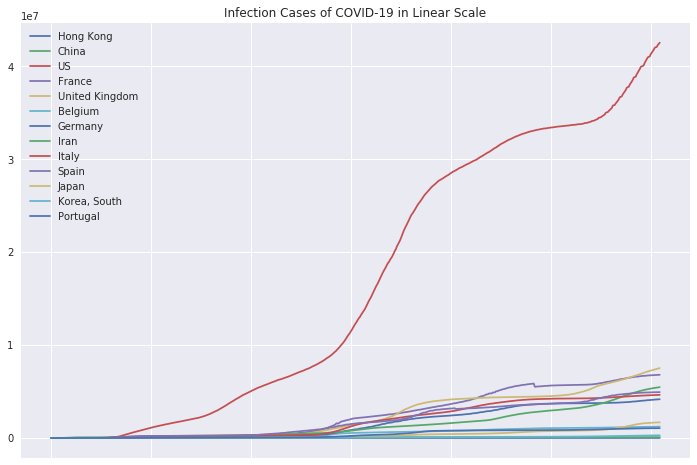

In [15]:
data_grouped.loc['Hong Kong'].plot()
data_grouped.loc['China'].plot()
data_grouped.loc['US'].plot()
data_grouped.loc['France'].plot()
data_grouped.loc['United Kingdom'].plot()
data_grouped.loc['Belgium'].plot()
data_grouped.loc['Germany'].plot()
data_grouped.loc['Iran'].plot()
data_grouped.loc['Italy'].plot()
data_grouped.loc['Spain'].plot()
data_grouped.loc['Japan'].plot()
data_grouped.loc['Korea, South'].plot()
data_grouped.loc['Portugal'].plot()
plt.legend()
plt.title('Infection Cases of COVID-19 in Linear Scale')

Text(0.5,1,'Infection Cases of COVID-19 in Log scale')

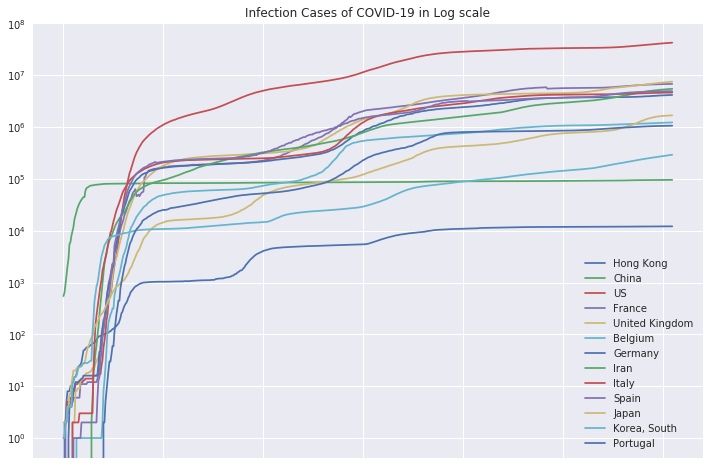

In [16]:
data_grouped.loc['Hong Kong'].plot()
data_grouped.loc['China'].plot()
data_grouped.loc['US'].plot()
data_grouped.loc['France'].plot()
data_grouped.loc['United Kingdom'].plot()
data_grouped.loc['Belgium'].plot()
data_grouped.loc['Germany'].plot()
data_grouped.loc['Iran'].plot()
data_grouped.loc['Italy'].plot()
data_grouped.loc['Spain'].plot()
data_grouped.loc['Japan'].plot()
data_grouped.loc['Korea, South'].plot()
data_grouped.loc['Portugal'].plot()
plt.legend()
plt.yscale("log")
plt.title('Infection Cases of COVID-19 in Log scale')